## 프로젝트 개요
- 이 데이터에는 연령, 성별, 컴퓨터, 상황, 질병, 감정에 대한 정보가 들어있다. 
- 실제 서비스를 위해서 문자 내용만 가지고 감성을 파악해야하기 때문에 위의 모든 데이터를 사용할 수 없다.
- 가장 우선시 하여 사용할 데이터는 감정 > 상황 
- 대화의 내용으로 질병, 성별, 연령을 유추는 할 수 있지만 그거는 너무 디테일한 내용이다. 우선 감정과 상황을 가지고 프로젝트를 진행 후 나중에 개선을 해보도록 하자

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 68.3 MB/s eta 0:00:00


## data

In [2]:
# !unzip /content/drive/MyDrive/인공지능/대화속감정인식/data/Training.zip -d /content/drive/MyDrive/인공지능/대화속감정인식/data
# !unzip /content/drive/MyDrive/인공지능/대화속감정인식/data/Validation.zip -d /content/drive/MyDrive/인공지능/대화속감정인식/data

In [3]:
from tqdm import tqdm
import glob
import json
import os
import re
import csv
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
train_path = "/content/drive/MyDrive/인공지능/대화속감정인식/data/감성대화말뭉치(최종데이터)_Training.json"
valid_path = "/content/drive/MyDrive/인공지능/대화속감정인식/data/감성대화말뭉치(최종데이터)_Validation.json"

## 데이터 확인

In [5]:
with open(train_path) as f:
      data = json.load(f)

In [6]:
len(data)

51628

In [7]:
print(data[0])

{'profile': {'persona-id': 'Pro_05349', 'persona': {'persona-id': 'A02_G02_C01', 'human': ['A02', 'G02'], 'computer': ['C01']}, 'emotion': {'emotion-id': 'S06_D02_E18', 'type': 'E18', 'situation': ['S06', 'D02']}}, 'talk': {'id': {'profile-id': 'Pro_05349', 'talk-id': 'Pro_05349_00053'}, 'content': {'HS01': '일은 왜 해도 해도 끝이 없을까? 화가 난다.', 'SS01': '많이 힘드시겠어요. 주위에 의논할 상대가 있나요?', 'HS02': '그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.', 'SS02': '혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요. ', 'HS03': '', 'SS03': ''}}}


### 감정 데이터 확인

In [8]:
emotion_list = []
for i in range(len(data)):
  emotion_list.append(data[i]['profile']['emotion']['type'])

In [9]:
counts = Counter(emotion_list)
print(counts)

Counter({'E37': 1229, 'E13': 1054, 'E24': 1002, 'E27': 993, 'E31': 991, 'E47': 984, 'E18': 975, 'E32': 971, 'E19': 969, 'E10': 958, 'E20': 958, 'E48': 953, 'E22': 950, 'E45': 949, 'E40': 937, 'E11': 926, 'E58': 918, 'E42': 911, 'E44': 910, 'E23': 906, 'E43': 901, 'E34': 901, 'E51': 900, 'E39': 899, 'E56': 897, 'E41': 896, 'E28': 896, 'E30': 893, 'E29': 884, 'E55': 883, 'E17': 882, 'E12': 875, 'E16': 873, 'E52': 872, 'E21': 870, 'E59': 870, 'E38': 869, 'E53': 865, 'E33': 864, 'E49': 861, 'E36': 860, 'E50': 859, 'E54': 859, 'E15': 845, 'E35': 842, 'E46': 840, 'E25': 838, 'E57': 833, 'E26': 828, 'E14': 803, 'E60': 660, 'E64': 655, 'E67': 639, 'E68': 634, 'E61': 631, 'E62': 609, 'E63': 597, 'E69': 570, 'E66': 568, 'E65': 563})


#### 전체 감정

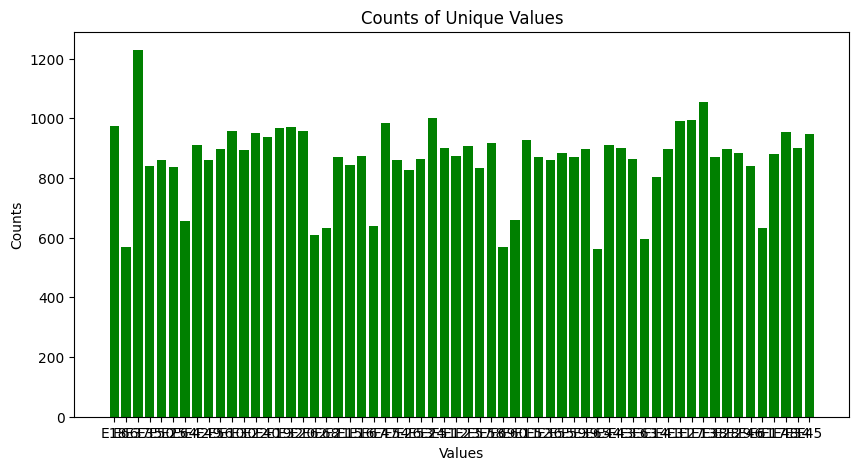

In [10]:
fig = plt.figure(figsize=(10, 5))
 
# 시각화할 데이터
x = list(counts.keys())
y = list(counts.values())
 
# bar 그래프 생성
plt.bar(x, y, color='green')
 
# 그래프 제목 설정
plt.title("Counts of Unique Values")
 
# x축과 y축 레이블 설정
plt.xlabel("Values")
plt.ylabel("Counts")
 
# 그래프 출력
plt.show()

#### 6개 감정으로 축소

In [11]:
anger_list = []
sadness_list = []
anxiety_list = []
wound_list = []
panic_list = []
joy_list = []

In [12]:
for i in range(len(data)):
  if 10 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 19:
    anger_list.append(data[i]['profile']['emotion']['type'])
  elif 20 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 29:
    sadness_list.append(data[i]['profile']['emotion']['type'])
  elif 30 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 39:
    anxiety_list.append(data[i]['profile']['emotion']['type'])
  elif 40 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 49:
    wound_list.append(data[i]['profile']['emotion']['type'])
  elif 50 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 59:
    panic_list.append(data[i]['profile']['emotion']['type'])
  elif 60 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 69:
    joy_list.append(data[i]['profile']['emotion']['type'])


In [13]:
print(len(anger_list))
print(len(sadness_list))
print(len(anxiety_list))
print(len(wound_list))
print(len(panic_list))
print(len(joy_list))

9160
9125
9319
9142
8756
6126


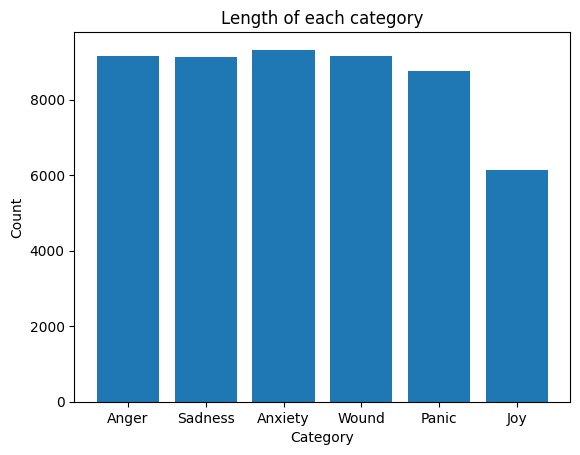

In [14]:
categories = [anger_list, sadness_list, anxiety_list, wound_list, panic_list, joy_list]
category_names = ['Anger', 'Sadness', 'Anxiety', 'Wound', 'Panic', 'Joy']

category_lengths = [len(category) for category in categories]

plt.bar(category_names, category_lengths)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Length of each category')
plt.show()

## 데이터 로더 구현하기
- 필요한 데이터
  - 대화
  - 발화자
  - 감정 
- 필요한 로직
  - 60가지로 나뉘어져 있는 감정을 6개로 바꾼다.
  - 각 문장 앞에 CLS 토큰 지정
  - 각 발화자 앞에 스페셜 토큰을 지정한다. 
    - 사람, 시스템, 사람, 시스템, 사람, 시스템 번갈아가며 나오기 때문에 특정 키 값을 가져올 필요없이 간격으로 스폐셜 토큰을 지정하면 될 것 같다.
- 데이터를 다음과 같은 형태로 만들기
  - [사람, 시스템, 사람, 시스템, 사람, 시스템, 감정]

In [32]:
data[0]['talk']['content']

{'HS01': '일은 왜 해도 해도 끝이 없을까? 화가 난다.',
 'SS01': '많이 힘드시겠어요. 주위에 의논할 상대가 있나요?',
 'HS02': '그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.',
 'SS02': '혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요. ',
 'HS03': '',
 'SS03': ''}

In [31]:
for k,v in enumerate(data[0]['talk']['content']):
  print(k)

0
1
2
3
4
5


In [33]:
data_values = list(data[0]['talk']['content'].values())
values = [val for val in data_values if val != '']

In [35]:
with open(train_path) as f:
    data = json.load(f)

session_dataset  = []

for i in range(len(data)):
  if 10 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 19:
    data[i]['profile']['emotion']['type'] = 'Anger'
  elif 20 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 29:
    data[i]['profile']['emotion']['type'] = 'Sadness'
  elif 30 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 39:
    data[i]['profile']['emotion']['type'] = 'Anxiety'
  elif 40 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 49:
    data[i]['profile']['emotion']['type'] = 'Wound'
  elif 50 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 59:
    data[i]['profile']['emotion']['type'] = 'Panic'
  elif 60 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 69:
    data[i]['profile']['emotion']['type'] = 'Joy'

for i in range(len(data)):
  data_values = list(data[i]['talk']['content'].values())
  values = [val for val in data_values if val != '']
  values.append(data[i]['profile']['emotion']['type'])
  session.append(values)

In [36]:
session[0]

['일은 왜 해도 해도 끝이 없을까? 화가 난다.',
 '많이 힘드시겠어요. 주위에 의논할 상대가 있나요?',
 '그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.',
 '혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요. ',
 'Anger']

In [25]:
print(data[0]['talk']['content']['HS01'])

일은 왜 해도 해도 끝이 없을까? 화가 난다.


In [15]:
import json
from torch.utils.data import Dataset
from transformers import RobertaTokenizer
import torch

class data_loader(Dataset):
    def __init__(self,data_path):
        self.tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

        with open(train_path) as f:
          data = json.load(f)

        self.session_dataset  = []

        for i in range(len(data)):
          if 10 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 19:
            data[i]['profile']['emotion']['type'] = 'Anger'
          elif 20 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 29:
            data[i]['profile']['emotion']['type'] = 'Sadness'
          elif 30 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 39:
            data[i]['profile']['emotion']['type'] = 'Anxiety'
          elif 40 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 49:
            data[i]['profile']['emotion']['type'] = 'Wound'
          elif 50 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 59:
            data[i]['profile']['emotion']['type'] = 'Panic'
          elif 60 <= int(data[i]['profile']['emotion']['type'][-2:]) <= 69:
            data[i]['profile']['emotion']['type'] = 'Joy'

        for i in range(len(data)):
          data_values = list(data[i]['talk']['content'].values())
          values = [val for val in data_values if val != '']
          values.append(data[i]['profile']['emotion']['type'])
          session_dataset.append(values)

    def __len__(self):
        return len(self.session_dataset)

    def __getitem__(self,idx):
        return self.session.datasetp[idx]

IndentationError: ignored